In [18]:
import pickle
import os
import util
import collections
import matplotlib.pylab as plt
import numpy as np
from mxnet.contrib import text
from mxnet import nd
import seaborn as sns
sns.set()
from mxnet.gluon import data as gdata, nn
%matplotlib inline

Load data

In [19]:
parent_dir = '/Users/septem/Downloads/com_data'
data_dir = 'NHR_SITE'
def load_data_label():    
    data = util.load(os.path.join(parent_dir, 'data.pickle'))
    return list(zip(*data))

In [20]:
data, labels = load_data_label()
idx_filename = util.load(os.path.join(parent_dir, 'idx_filename.pickle'))
len(labels),len(set(labels))

(20000, 763)

In [4]:
counter = collections.Counter(labels)

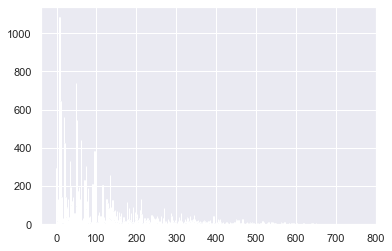

In [141]:
_labels, _values = zip(*counter.items())
plt.bar(np.arange(len(_labels)), _values)
plt.show()

In [5]:
cls2code = util.cls2code

idx2label = list(cls2code.keys())
label2idx = {label: i for i, label in enumerate(idx2label)}
code2label = {c: k for k,v in cls2code.items() for c in v}

Transform label

In [6]:
new_labels = [label2idx[code2label[code[:2]]] for code in labels]

In [145]:
def save_company_data():
    company_data = {}
    company_data['data'] = data
    company_data['target'] = new_labels
    company_data['target_names'] = idx2label
    company_data['name2idx'] = label2idx
    company_data['filename'] = idx_filename
    with open('./company_data.pickle', 'wb+') as f:
        pickle.dump(company_data, f)
save_company_data()

SBI after aggregation

/Users/septem/opt/miniconda3/envs/da/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


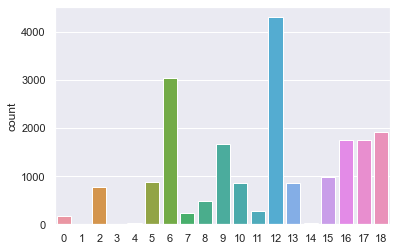

In [10]:
sns.countplot(new_labels)
plt.savefig('label_distribution.png')

In [23]:
# def get_tokenized_data(data):
#     def tokenizer(text):
#         return [tok.lower() for tok in text.split(' ')]
#     return [tokenizer(text) for text, _ in data]

# def get_vocab(data):  
#     tokenized_data = get_tokenized_data(data)
#     counter = collections.Counter([tk for st in tokenized_data for tk in st])
#     return text.vocab.Vocabulary(counter, min_freq=5,
#                                  reserved_tokens=['<pad>'])

# vocab = get_vocab(train_data)
# '# words in vocab:', len(vocab)

('# words in vocab:', 41658)

In [24]:
# def preprocess(data, vocab): 
#     max_l = 500  
#     def pad(x):
#         return x[:max_l] if len(x) > max_l else x + [
#             vocab.token_to_idx['<pad>']] * (max_l - len(x))

#     tokenized_data = get_tokenized_data(data)
#     features = nd.array([pad(vocab.to_indices(x)) for x in tokenized_data])
#     labels = nd.array([label for _, label in data])
#     return features, labels

In [25]:
# batch_size = 64
# train_set = gdata.ArrayDataset(*preprocess(train_data, vocab))
# test_set = gdata.ArrayDataset(*preprocess(test_data, vocab))
# train_iter = gdata.DataLoader(train_set, batch_size, shuffle=True)
# test_iter = gdata.DataLoader(test_set, batch_size)

In [26]:
# for x,y in train_iter:
#     print(x)
#     print(y)
#     break


[[9.5300e+02 0.0000e+00 4.0000e+00 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.2364e+04 6.4710e+03 3.7955e+04 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [4.9400e+02 1.8000e+01 2.0638e+04 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 ...
 [3.8155e+04 1.8000e+01 3.2700e+02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [0.0000e+00 2.0000e+00 1.9700e+02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [4.1710e+03 0.0000e+00 1.0000e+01 ... 1.2000e+01 7.0000e+00 1.5550e+04]]
<NDArray 64x500 @cpu(0)>

[ 6.  6. 15. 15. 12. 18. 12. 13.  9. 12. 17. 16. 12. 15.  6. 17. 15. 12.
 17.  6. 12. 12. 12. 16. 17.  0. 16. 12.  0. 16.  9. 10.  7. 10. 12. 12.
 12. 12. 11. 16. 18. 17.  6. 17.  6.  6. 16. 16. 10. 10. 17. 10. 16.  5.
  9. 16. 12. 17.  6. 13.  5.  9.  6. 17.]
<NDArray 64 @cpu(0)>


In [41]:
for f in os.listdir('/Users/septem/Downloads/com_data'):
    print(f)

test.pickle
.DS_Store
data.pickle
idx_filename.pickle
SBI 2008 versie 2018 engels.pdf
NACE_REV2_20210115_114736.csv
NACE_REV2_20210115_114521.csv
train.pickle
id_code.csv


In [50]:
# parent_dir = '/Users/septem/Downloads/com_data'
# def save(obj, filename, parent_dir = parent_dir):
#     with open(os.path.join(parent_dir, filename), 'wb') as f:
#         pickle.dump(obj, f)
# save(train_data, 'train_set', parent_dir)
# save(test_data, 'test_set', parent_dir)
# save(vocab, 'vocab', parent_dir)

In [33]:
# class BiRNN(nn.Block):
#     def __init__(self, vocab, embed_size, num_hiddens, num_layers, **kwargs):
#         super(BiRNN, self).__init__(**kwargs)
#         self.embedding = nn.Embedding(len(vocab), embed_size)

#         self.encoder = rnn.LSTM(num_hiddens, num_layers=num_layers,
#                                 bidirectional=True, input_size=embed_size)
#         self.decoder = nn.Dense(2)

#     def forward(self, inputs):
#         embeddings = self.embedding(inputs.T)
#         outputs = self.encoder(embeddings)
#         encoding = nd.concat(outputs[0], outputs[-1])
#         outs = self.decoder(encoding)
#         return outs

In [52]:
# len(set(labels))

19

In [64]:
# data = train_data + test_data
# with open('data_raw.pickle', 'wb+') as f:
#     pickle.dump(data,f)